### Library

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from random import randint
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score


### Load Data

In [2]:
df = pd.read_csv('./pilkada-1000.csv')

### Preprocessing

In [3]:
df.drop(['Nama Kandidat (1)', 'Nama Kandidat (2)', 'Nama Daerah'], axis=1, inplace=True)
df["Hasil Pilkada"].replace({"Kalah": 0, "Menang": 1}, inplace=True)
df["Jalur Pencalonan"].replace({"PERORANGAN": 0, "PARPOL": 1}, inplace=True)
df["Latar Belakang Profesi (1)"].replace({ "SIPIL": 0, "TNI/POLRI": 1 }, inplace=True)
df["Latar Belakang Profesi (2)"].replace({ "SIPIL": 0, "TNI/POLRI": 1 }, inplace=True)
df["Gender (1)"].replace({ "P": 1, "L": 0}, inplace=True)
df["Gender (2)"].replace({ "P": 1, "L": 0}, inplace=True)

### Decision Tree Model

In [4]:
X = df.iloc[:, 1:]
Y = df['Hasil Pilkada']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, random_state=0)

In [5]:
ct = ["gini", "entropy", "log_loss"]
splitter = ["best", "random"]
params = {}
max = -float("inf")
decision_tree = None

for _ in range(1000):
    test = {
        "criterion": ct[randint(0, 2)],
        "max_depth": randint(1, 25),
        "max_leaf_nodes": randint(2, 25),
        "min_samples_leaf": randint(2, 25),
        "min_samples_split": randint(2, 25),
        "splitter": splitter[randint(0, 1)], 
    }

    decision_tree = DecisionTreeClassifier(
        criterion=test["criterion"],
        max_depth=test["max_depth"],
        max_leaf_nodes=test["max_leaf_nodes"],
        min_samples_leaf=test["min_samples_leaf"],
        min_samples_split=test["min_samples_split"],
        splitter=test["splitter"],
    )

    decision_tree.fit(X_train, Y_train)
    score = decision_tree.score(X_test, Y_test)
    
    if score > max:
        max = score
        params = test
        
    print("Akurasi:", score)

print("max: ", max)
print(params)

Akurasi: 0.675
Akurasi: 0.67
Akurasi: 0.705
Akurasi: 0.685
Akurasi: 0.65
Akurasi: 0.735
Akurasi: 0.68
Akurasi: 0.68
Akurasi: 0.72
Akurasi: 0.655
Akurasi: 0.685
Akurasi: 0.66
Akurasi: 0.68
Akurasi: 0.665
Akurasi: 0.695
Akurasi: 0.735
Akurasi: 0.675
Akurasi: 0.67
Akurasi: 0.725
Akurasi: 0.68
Akurasi: 0.725
Akurasi: 0.725
Akurasi: 0.685
Akurasi: 0.675
Akurasi: 0.655
Akurasi: 0.71
Akurasi: 0.65
Akurasi: 0.685
Akurasi: 0.675
Akurasi: 0.695
Akurasi: 0.68
Akurasi: 0.645
Akurasi: 0.695
Akurasi: 0.725
Akurasi: 0.665
Akurasi: 0.69
Akurasi: 0.715
Akurasi: 0.695
Akurasi: 0.685
Akurasi: 0.68
Akurasi: 0.675
Akurasi: 0.62
Akurasi: 0.675
Akurasi: 0.665
Akurasi: 0.71
Akurasi: 0.755
Akurasi: 0.695
Akurasi: 0.68
Akurasi: 0.64
Akurasi: 0.68
Akurasi: 0.685
Akurasi: 0.725
Akurasi: 0.675
Akurasi: 0.665
Akurasi: 0.675
Akurasi: 0.67
Akurasi: 0.725
Akurasi: 0.675
Akurasi: 0.675
Akurasi: 0.645
Akurasi: 0.72
Akurasi: 0.675
Akurasi: 0.66
Akurasi: 0.68
Akurasi: 0.705
Akurasi: 0.63
Akurasi: 0.64
Akurasi: 0.75
Akuras

In [6]:
params = {
    "criterion": "gini",
    "max_depth": 4,
    "max_leaf_nodes": 8,
    "min_samples_leaf": 15,
    "min_samples_split": 8,
    "splitter": "best",

}
decision_tree = DecisionTreeClassifier(**params)
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=8, min_samples_leaf=15,
                       min_samples_split=8)

### Load Data

In [7]:
df_2 = pd.read_csv('./pilkada-100-uas.csv')

FileNotFoundError: [Errno 2] No such file or directory: './pilkada-100-uas.csv'

### Preprocessing

In [ ]:
df_2.drop(['Nama Kandidat (1)', 'Nama Kandidat (2)', 'Nama Daerah'], axis=1, inplace=True)
df_2["Jalur Pencalonan"].replace({"PERORANGAN": 0, "PARPOL": 1}, inplace=True)
df_2["Latar Belakang Profesi (1)"].replace({ "SIPIL": 0, "TNI/POLRI": 1 }, inplace=True)
df_2["Latar Belakang Profesi (2)"].replace({ "SIPIL": 0, "TNI/POLRI": 1 }, inplace=True)
df_2["Gender (1)"].replace({ "P": 1, "L": 0}, inplace=True)
df_2["Gender (2)"].replace({ "P": 1, "L": 0}, inplace=True)
df_2['Hasil Pilkada'].replace({"Kalah": 0, "Menang": 1}, inplace=True)

In [ ]:
Y_100 = df_2['Hasil Pilkada']
X_100 = df_2.iloc[:, 1:]

predictions = decision_tree.predict(X_100)
actual = Y_100

accuracy = accuracy_score(Y_100, predictions)
precision = precision_score(Y_100, predictions, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")

Accuracy: 0.76
Precision: 0.7639257294429709


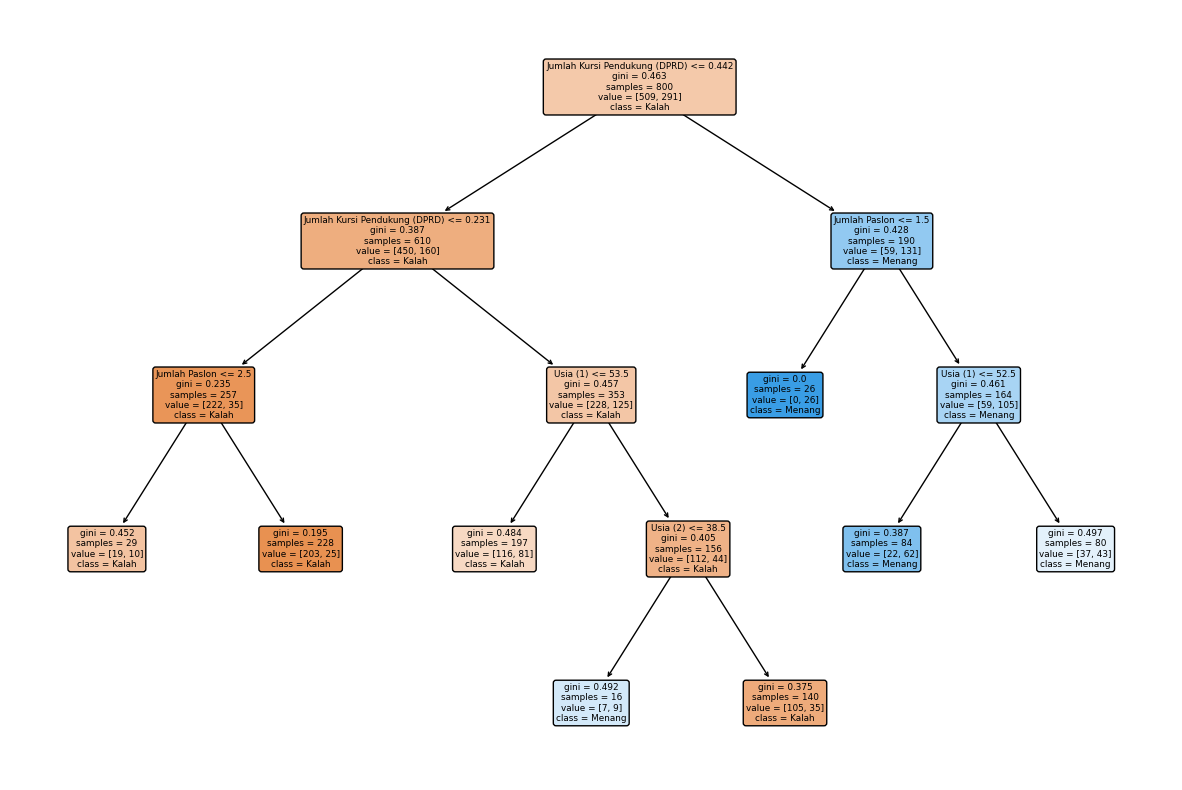

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
tree.plot_tree(
    decision_tree,
    filled=True,
    feature_names=X.columns,
    class_names=["Kalah", "Menang"],
    rounded=True,
    ax=ax,
)

plt.show()